In [1]:
import sys
sys.path.append("../..")
sys.path.append("../../..")

In [2]:
# import pandas as pd
# import numpy as np
# import seaborn as sns
# import matplotlib.pyplot as plt
# from scipy.stats import mannwhitneyu
# from scipy.stats import fisher_exact
# from sklearn.metrics import confusion_matrix
# import matplotlib.pyplot as plt
# pd.set_option('mode.chained_assignment', None)
# import utility

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu
from scipy.stats import fisher_exact
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
pd.set_option('mode.chained_assignment', None)
import utility
import r_plot_utils
from pdf2image import convert_from_path
from PIL import Image
from IPython.display import display

In [4]:
# df = pd.read_excel("../../../data/yeast_metadata.xlsx", sheet_name="unfiltered_gain")

In [5]:
df = pd.read_csv("yeast_evolved_genome_metadata.csv")

In [6]:
# rearrange cols in df 
df = df[['Position', 'CHROM', 'REF', 'ALT', 'population_name', 'G70_ref_counts', 'accumulate_gain','G1410_ref_counts', 'G2640_ref_counts', 'G5150_ref_counts',
       'G7530_ref_counts', 'G10150_ref_counts', 'G70_alt_counts',
       'G1410_alt_counts', 'G2640_alt_counts', 'G5150_alt_counts',
       'G7530_alt_counts', 'G10150_alt_counts', 'kGain_evolved_genome']]

In [7]:
# data_all_copy.columns[-7:-1]

In [8]:
data_all_copy = df.copy()
all_mutation = pd.DataFrame() # The all_mutation dataframe contain generation and population wise accumulated gain

for i in data_all_copy.columns[-7:-1]:
    new_df_tmp = pd.DataFrame()
    new_df = data_all_copy[data_all_copy.loc[:, i]!=0]
    new_df_tmp = new_df[["population_name", 'CHROM', 'Position', 'REF','ALT']]
    new_df_tmp.loc[:, "generation"] = i
    new_df_tmp.loc[:, "AG"] = new_df.loc[:, "accumulate_gain"]
    new_df_tmp.loc[:, 'kGain_evolved_genome'] = new_df.loc[:, 'kGain_evolved_genome']
    new_df_tmp.loc[:, "allele count"] = new_df.loc[:, i]
    all_mutation = pd.concat([all_mutation, new_df_tmp], axis = 0)
    
    
all_mutation.reset_index(inplace=True, drop=True)
# all_mutation['generation_number'] = all_mutation['generation'].str.extract(r'(\d+)').astype(int)

all_mutation.head()

,population_name,CHROM,Position,REF,ALT,generation,AG,kGain_evolved_genome,allele count
0,P1C11,chrX,66,C,T,G70_alt_counts,6.067923,6.067923,7
1,P1C11,chrX,69,T,A,G70_alt_counts,-4.705100,-4.705100,7
2,P1C11,chrX,73,C,T,G70_alt_counts,3.963808,3.963808,7
3,P2B04,chrX,73,C,T,G70_alt_counts,3.963808,3.963808,5
4,P1B02,chrX,74,T,C,G70_alt_counts,-2.479826,-2.479826,5


In [9]:
# all_mutation

In [10]:
ann = pd.read_csv("../../../data/yeast_gene_annotations.tsv",
                  sep="\t", on_bad_lines='skip')
ann.head()

,Gene_ORF,Gene,ORF,SGDID,Essential_by_yeastmine,Essential_by_Liu2015,Essential_by_Giaever2002,featureType,briefDescription,description,functionSummary,phenotypeSummary,chromosome,start,end,orf_strand,go_ids,go_terms,go_types
0,GAS5,GAS5,YOL030W,S000005390,False,False,False,ORF,"1,3-beta-glucanosyltransferase","1,3-beta-glucanosyltransferase; has similarity...",NaN,NaN,chrXV,268187,269641,1,GO:0005576;GO:0005618;GO:0005783;GO:0006074;GO...,extracellular region;cell wall;endoplasmic ret...,cellular_component;cellular_component;cellular...
1,GAS4,GAS4,YOL132W,S000005492,False,False,False,ORF,"1,3-beta-glucanosyltransferase","1,3-beta-glucanosyltransferase; involved with ...",NaN,NaN,chrXV,71300,72715,1,GO:0000324;GO:0005618;GO:0005886;GO:0009277;GO...,fungal-type vacuole;cell wall;plasma membrane;...,cellular_component;cellular_component;cellular...
2,GAS2,GAS2,YLR343W,S000004335,False,False,False,ORF,"1,3-beta-glucanosyltransferase","1,3-beta-glucanosyltransferase; involved with ...",NaN,NaN,chrXII,816094,817761,1,GO:0000324;GO:0005618;GO:0005737;GO:0005886;GO...,fungal-type vacuole;cell wall;cytoplasm;plasma...,cellular_component;cellular_component;cellular...
3,SLC1,SLC1,YDL052C,S000002210,False,False,False,ORF,1-acyl-sn-glycerol-3-phosphate acyltransferase,1-acyl-sn-glycerol-3-phosphate acyltransferase...,NaN,NaN,chrIV,362672,363583,-1,GO:0003841;GO:0005783;GO:0005811;GO:0006629;GO...,1-acylglycerol-3-phosphate O-acyltransferase a...,molecular_function;cellular_component;cellular...
4,FAB1,FAB1,YFR019W,S000001915,False,False,False,ORF,1-phosphatidylinositol-3-phosphate 5-kinase,1-phosphatidylinositol-3-phosphate 5-kinase; v...,NaN,Non-essential gene; null mutant has defective ...,chrVI,184502,191338,1,GO:0000166;GO:0000285;GO:0000329;GO:0005524;GO...,nucleotide binding;1-phosphatidylinositol-3-ph...,molecular_function;molecular_function;cellular...


In [11]:
# replace in df Chrom in that chrmt with chrmito
ann['chromosome'] = ann['chromosome'].replace('chrmt', 'chrmito')

In [12]:
import pandas as pd

# Ensure `CHROM` and `chromosome` are in the same format
ann['chromosome'] = ann['chromosome'].str.lower()
all_mutation['CHROM'] = all_mutation['CHROM'].str.lower()


In [13]:
for i in range(all_mutation.shape[0]):

    chrom = all_mutation.loc[i, "CHROM"]

    pos = all_mutation.loc[i, "Position"]
    # pos = 268188
    # chrom = "chrxv"

    tmp = ann[(ann["chromosome"] == chrom) & (ann["start"] <= pos) & (pos <= ann["end"])]
    
    if tmp.shape[0]!=0:
        all_mutation.loc[i, "essential"] = tmp["Essential_by_Liu2015"].values[0]

    # else:
    #     all_mutation.loc[i, "essential"] = None



In [14]:
all_mutation["essential"].dropna().value_counts()

essential
False    209470
True       9661
Name: count, dtype: int64

In [15]:
all_mutation

,population_name,CHROM,Position,REF,ALT,generation,AG,kGain_evolved_genome,allele count,essential
0,P1C11,chrx,66,C,T,G70_alt_counts,6.067923,6.067923,7,NaN
1,P1C11,chrx,69,T,A,G70_alt_counts,-4.705100,-4.705100,7,NaN
2,P1C11,chrx,73,C,T,G70_alt_counts,3.963808,3.963808,7,NaN
3,P2B04,chrx,73,C,T,G70_alt_counts,3.963808,3.963808,5,NaN
4,P1B02,chrx,74,T,C,G70_alt_counts,-2.479826,-2.479826,5,NaN
...,...,...,...,...,...,...,...,...,...,...
500919,P3D10,chriv,1525964,C,T,G10150_alt_counts,8.835324,8.835324,4,NaN
500920,P3D11,chriv,1525964,C,T,G10150_alt_counts,8.835324,8.835324,2,NaN
500921,P3E08,chriv,1525964,C,T,G10150_alt_counts,8.835324,8.835324,2,NaN
500922,P3F09,chriv,1525964,C,T,G10150_alt_counts,8.835324,8.835324,6,NaN


##### Box plot of wild type kGain vs generation

P-value = 1.65e-17 and effect size = 3.29e-01 for G70_alt_counts,
P-value = 2.20e-35 and effect size = 3.24e-01 for G1410_alt_counts,
P-value = 2.94e-27 and effect size = 3.67e-01 for G2640_alt_counts,
P-value = 6.18e-32 and effect size = 3.28e-01 for G5150_alt_counts,
P-value = 5.75e-26 and effect size = 3.14e-01 for G7530_alt_counts,
P-value = 2.30e-32 and effect size = 3.10e-01 for G10150_alt_counts,


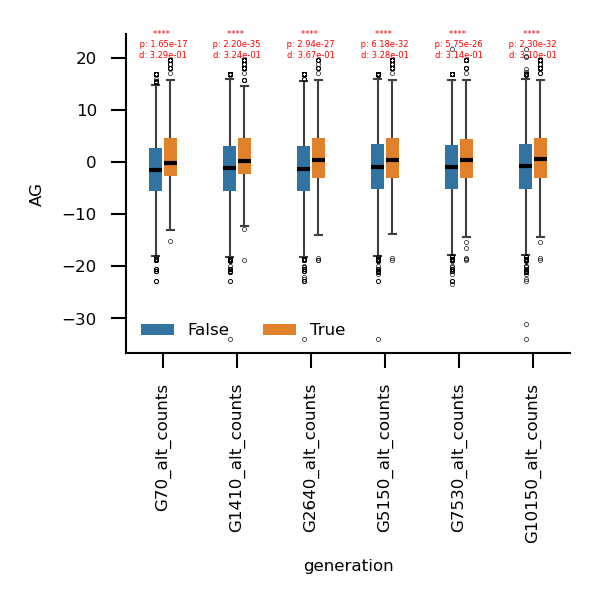

In [16]:
# Plot each score's cumulative sum separately
import seaborn as sns
fig, ax = plt.subplots(1, 1, figsize=(2.1, 2.1), dpi = 300)
ax = sns.boxplot(x='generation', y='AG', data=all_mutation, hue='essential', ax =ax, boxprops=dict(edgecolor="black", linewidth=0),flierprops=dict(marker='o', markeredgecolor='black'), width=0.4,linewidth=0.5, fliersize=0.15, dodge=True, medianprops={"color": "black","linewidth":1}, gap = 0.1)
ax = utility.custom_figure_axis(ax=ax, fontsize=4, show_ticks = True, rotation=90)
ax = utility.return_box_with_p_effect_size(ax, data = all_mutation, x_columns = 'generation', y_columns = 'AG', group1_name = True, group2_name = False, y_pos = 20, hue_columns="essential", fontsize=2)

ax.legend(ncol = 2, frameon = False, fontsize=4)
plt.tight_layout()
# plt.savefig("yeast_esential.pdf", dpi = 300)

##### Box plot of wild type evolved kGain vs generation

In [17]:
def get_significance_star(p):
    if p < 0.0001:
        return '****'
    elif p < 0.001:
        return '***'
    elif p < 0.01:
        return '**'
    elif p < 0.05:
        return '*'
    else:
        return 'ns'



def median_based_distance(group1, group2):
    """

    
    Parameters:
        group1: list or numpy array, first sample
        group2: list or numpy array, second sample
    
    Returns:
        d_median: float, effect size based on median and MAD
    """

    import numpy as np
    from scipy.stats import median_abs_deviation
    # Compute medians
    median1 = pd.Series(group1).median()
    median2 = pd.Series(group2).median()


    
    # Compute MAD (median absolute deviation)
    mad1 = median_abs_deviation(group1, nan_policy = "omit")  # Scale for consistency with std
    mad2 = median_abs_deviation(group2, nan_policy = "omit")



    # Compute pooled MAD
    n1, n2 = len(group1), len(group2)
    pooled_mad = np.sqrt(((n1 - 1) * mad1**2 + (n2 - 1) * mad2**2) / (n1 + n2 - 2))
    
    # Compute Cohen's d using median and MAD
    d_median = (median1 - median2) / pooled_mad if pooled_mad > 0 else np.nan
    
    return d_median

###### return one sided  mannwhitneyu test p value

def man_whiteney(group1, group2):   
    
    """
    Perform a one-sided Mann-Whitney U test and return the p-value.
    
    This function compares two independent groups and tests if 'group1' tends to have larger values than 'group2'.
    
    Parameters:
        group1 (array-like): The data of the first group.
        group2 (array-like): The data of the second group.
    
    Returns:
        float: The p-value from the one-sided Mann-Whitney U test.
    
    Notes:
        The null hypothesis is that the distribution of 'group1' is not greater than 'group2'.
    """

    from scipy.stats import mannwhitneyu
    statistic, p_value = mannwhitneyu(group1, group2, alternative='greater', nan_policy = "omit")
    return p_value



In [18]:
parallel_genes_df = pd.read_excel("/home/abhishekh/Downloads/NIHMS908078-supplement-Supplementary_Table_3.xlsx")
parallel_genes_df["Gene_parallel_type"] = "parallel"


In [19]:


# def return_box_with_p_effect_size(ax, data, x_columns, y_columns, group1_name, group2_name, y_pos, hue_columns=None, fontsize=5):


#     import pingouin as pg
    
#     effect_size = dict()
#     p_val = dict()

#     data = data.copy()
    
#     # Extract x-tick labels and their positions from the Axes object
#     xtick_labels = [tick.get_text() for tick in ax.get_xticklabels()]
#     # print(xtick_labels)
#     xtick_positions = [tick.get_position()[0] for tick in ax.get_xticklabels()]
#     # print(xtick_positions)

#     try:

#         if not hue_columns is None:
            

#             for idx, (label, pos) in enumerate(zip(xtick_labels, xtick_positions)):

#                 try:
#                     # print(x_columns, label)
#                     # print(data.head())
#                     # Filter data for the current x-tick category
#                     data_tmp = data[data[x_columns] == label]

#                     # print(data_tmp.head())

                    

                    
#                     # print("hello")
#                     # print(data_tmp[data_tmp[hue_columns] == group1_name])
#                     # Separate groups based on hue column
#                     group1 = data_tmp[data_tmp[hue_columns] == group1_name][y_columns]
#                     # print(group1)
#                     group2 = data_tmp[data_tmp[hue_columns] == group2_name][y_columns]

#                     # print(group1)
#                     # print(group2)

#                     # Compute p-value using Mann-Whitney U test
#                     p_value = man_whiteney(group1, group2)
                    

#                     # Compute effect size using Cohen's d
#                     d_value = median_based_distance(group1, group2)

#                     star = get_significance_star(p_value)
                    
#                     p_val[label] = p_value
#                     effect_size[label] = d_value

#                     # Annotate the plot with p-value and effect size
#                     ax.text(pos, y_pos, f"{star} \n p: {p_value:.2e} \nd: {d_value:.2e}", ha="center", fontsize=fontsize, color="red")
#                     # ax.text(pos, y_pos + star_offset, star, ha="center", va="bottom", fontsize=fontsize+1, color="black", fontweight='bold')


#                     # print(f"x: {label}, P-value= {p_value:.2e} and effect size = {d_value:.2e} for ")
#                     print(f"P-value = {p_value:.2e} and effect size = {d_value:.2e} for {label},")
                    
#                 except:
#                     continue
#             # print("The median effect size is : " + str(pd.Series(effect_size.values()).median()))
#             # print("I am here")

#             return ax
            
#         if ((hue_columns is None) and (len(xtick_labels) == 2)):   

#             try: 
#                 # for idx, (label, pos) in enumerate(zip(xtick_labels, xtick_positions)): 
#                 group1 = data[data[x_columns] == group1_name][y_columns]
#                 group2 = data[data[x_columns] == group2_name][y_columns]

                
        
#                 # Compute p-value using Mann-Whitney U test
#                 p_value = man_whiteney(group1, group2)

#                 # Compute effect size using Cohen's d
#                 d_value = median_based_distance(group1, group2)

#                 # Annotate the plot with p-value and effect size
#                 ax.text(0.5, y_pos, f"p: {p_value:.2e} \nd: {d_value:.2e}", ha="center", fontsize=fontsize, color="red")
                
#                 print(f"P-value = {p_value:.2e} and effect size = {d_value:.2e}")
#                 return ax

#             except:
#                 print("There is some error")
                


#             # print(f"x: {label}, p-value: {p_value:.2e}, Cohen's d: {d_value:.2e}")
            

#     except:

#         print("There is some error")




In [20]:
# # Plot each score's cumulative sum separately
# import seaborn as sns
# fig, ax = plt.subplots(1, 1, figsize=(2.1, 2.1), dpi = 300)
# ax = sns.boxplot(x='generation', y='kGain_evolved_genome', data=all_mutation, hue='essential', ax =ax, boxprops=dict(edgecolor="black", linewidth=0),flierprops=dict(marker='o', markeredgecolor='black'), width=0.4,linewidth=0.5, fliersize=0.15, dodge=True, medianprops={"color": "black","linewidth":1}, gap = 0.1)
# ax = utility.custom_figure_axis(ax=ax, fontsize=4, show_ticks = True, rotation=90)
# ax = return_box_with_p_effect_size(ax, data = all_mutation, x_columns = 'generation', y_columns = 'kGain_evolved_genome', group1_name = True, group2_name = False, y_pos = 20, hue_columns="essential", fontsize=2)

# ax.legend(ncol = 2, frameon = False, fontsize=4)
# plt.tight_layout()
# # plt.savefig("yeast_esential.pdf", dpi = 300)

In [21]:
all_mutation['generation_number'] = all_mutation['generation'].str.extract(r'G(\d+)_')[0].astype(int)


P-value = 3.72e-16 and effect size = 3.06e-01 for G70_alt_counts,
P-value = 1.69e-32 and effect size = 3.14e-01 for G1410_alt_counts,
P-value = 1.39e-24 and effect size = 3.65e-01 for G2640_alt_counts,
P-value = 1.52e-28 and effect size = 2.97e-01 for G5150_alt_counts,
P-value = 6.82e-23 and effect size = 2.89e-01 for G7530_alt_counts,
P-value = 1.04e-27 and effect size = 2.97e-01 for G10150_alt_counts,


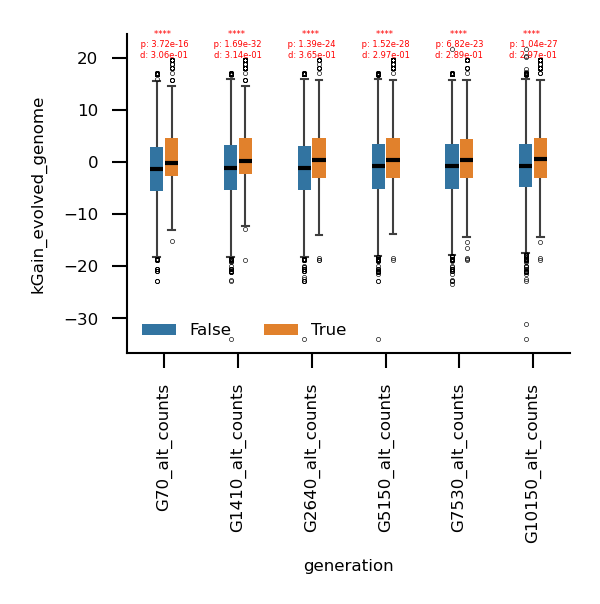

In [22]:
# Plot each score's cumulative sum separately
import seaborn as sns
fig, ax = plt.subplots(1, 1, figsize=(2.1, 2.1), dpi = 300)
ax = sns.boxplot(x='generation', y='kGain_evolved_genome', data=all_mutation, hue='essential', ax =ax, boxprops=dict(edgecolor="black", linewidth=0),flierprops=dict(marker='o', markeredgecolor='black'), width=0.4,linewidth=0.5, fliersize=0.15, dodge=True, medianprops={"color": "black","linewidth":1}, gap = 0.1)
ax = utility.custom_figure_axis(ax=ax, fontsize=4, show_ticks = True, rotation=90)
ax = utility.return_box_with_p_effect_size(ax, data = all_mutation, x_columns = 'generation', y_columns = 'kGain_evolved_genome', group1_name = True, group2_name = False, y_pos = 20, hue_columns="essential", fontsize=2)

ax.legend(ncol = 2, frameon = False, fontsize=4)
plt.tight_layout()
# plt.savefig("yeast_esential.pdf", dpi = 300)

/home/abhishekh/anaconda3/envs/amr/lib/python3.10/site-packages/rpy2/robjects/pandas2ri.py:65: UserWarning: Error while trying to convert the column "essential". Fall back to string conversion. The error is: <class 'numpy.bool_'>
  warnings.warn('Error while trying to convert '
R[write to console]: 
Attaching package: ‘dplyr’


R[write to console]: The following objects are masked from ‘package:stats’:

    filter, lag


R[write to console]: The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.


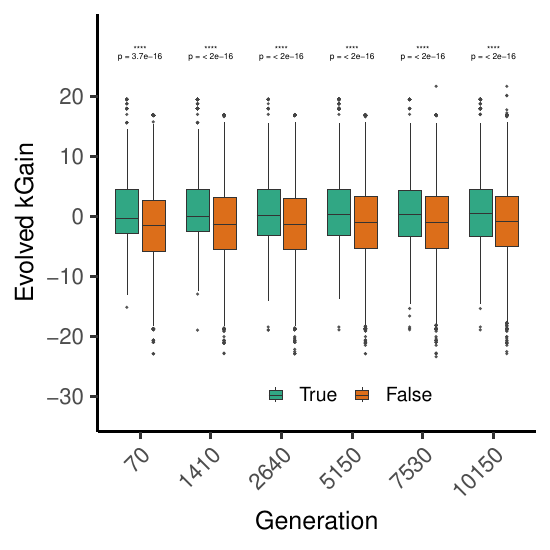

In [23]:

pdf_file = "yeast_evolved_kGain_vsgeneration_with_essential_gene_as_hue.pdf"
r_plot_utils.plot_grouped_violinboxplot_r(
    all_mutation[["generation_number","kGain_evolved_genome", "essential"]].dropna(),
    fill_colors=["#1b9e77", "#d95f02"], point_colors=["#1b9e77", "#d95f02"],
    legend_position=[0.35, 0.03],
    y_limits=[-30, 28], y_breaks=list(range(-30, 28, 10)),
    show_pvalue=True, show_signif=True,
    pvalue_text_size=1.2,
    xtick_rotation=45,
    # box_width=0.5, box_linewidth=0.25, median_linewidth=0.5,outlier_color="blue",
    # outlier_shape=21,
    pvalue_y_npc=0.97, signif_y_npc=0.99,
    font_size_title=9, font_size_xlabel=9, font_size_ylabel=9, font_size_xtick=8, font_size_ytick=8, font_size_legend=7, font_size_annotation=2,
    x_column="generation", y_column="kGain_evolved_genome",
    alternative = "less",
    hue_column="essential",
    plot_title=None, x_label="Generation", y_label="Evolved kGain",
    reference_level=True,
    # font_size_annotation=2,
    pdf_file=pdf_file,
    pdf_width=7, pdf_height=7, pdf_dpi=600,
    show_points=False,
    
    dodge_width=0.75,
    violin_width = 0.7,
    violin_linewidth = 0,
    box_width = 0.65,
    box_linewidth = 0,
    outlier_shape = 16,
    outlier_color = "#444444",
    outlier_size = 0.25,
    # median_linewidth = 1

)


pages = convert_from_path(pdf_file, dpi=200)
display(pages[0])  # Show the first page as an image
